# Project Title: PRCP-1016-Heart Disease Prediction

## Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.

* Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

* Task3:-Suggestions to the Hospital to awake the predictions of heart diseases prevent life threats.

### Features

1. There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
2. slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
3. thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
4. resting_blood_pressure (type: int): resting blood pressure
5. chest_pain_type (type: int): chest pain type (4 values)
6. num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
7. fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
8. resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
9. serum_cholesterol_mg_per_dl (type: int): serum cholesterol in mg/dl
10. oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
11. sex (type: binary): 0: female, 1: male
12. age (type: int): age in years
13. max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
14. exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True

### Importing Dependencies

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [36]:
data=pd.read_csv('data.csv')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


### Basic Checks

In [38]:
data.shape

(180, 15)

In [39]:
type(data)

pandas.core.frame.DataFrame

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [41]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [42]:
data=data.drop(columns=['patient_id'],axis=1)

### Converting object data type to int

In [44]:
thal = {'normal': 0, 'fixed_defect': 1, 'reversible_defect': 2}
data['thal'] = data['thal'].map(thal)
print(data['thal'].head())

0    0
1    0
2    0
3    2
4    2
Name: thal, dtype: int64


In [45]:
x=data.drop(columns=['heart_disease_present'],axis=1)
x

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,0,180,4,0,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,0,124,3,2,1,0,255,0.0,1,48,175,0


In [46]:
y=data['heart_disease_present']
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [47]:
data.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,0.866667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.971091,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [48]:
data['heart_disease_present'].value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int64  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

### EDA

In [51]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(x)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


INSIGHTS
* People having slope_of_peak_exercise_st_segment 1 and 2 contribute towards 94% of the data.
* people in thal containing normal and reversed defect contribute 95% of the data.
* resting blood pressure of the majority of the group lies in between 120 - 140.
* people with chest pain 4 are high in count 46%.
* people having 0 number of major vessel are high in number 59%.
* people with blood sugar < 120 are high is count 84%, rest have blood sugar > 120.
* resting EKG results people with 2 and 0 are approx equal.
* majority of the people have cholesterol between 200 - 300 mg per dl.
* people with no depression are the highest with 31%.
* people with age between 44 - 58 are the highest.
* max heart rate achieved lies between 142 - 162.

In [53]:
data.groupby('slope_of_peak_exercise_st_segment')['heart_disease_present'].sum()

slope_of_peak_exercise_st_segment
1    25
2    47
3     8
Name: heart_disease_present, dtype: int64

In [54]:
data.groupby('thal')['heart_disease_present'].sum()

thal
0    20
1     4
2    56
Name: heart_disease_present, dtype: int64

In [55]:
data.groupby('chest_pain_type')['heart_disease_present'].sum()

chest_pain_type
1     4
2     4
3    13
4    59
Name: heart_disease_present, dtype: int64

In [56]:
data.groupby('num_major_vessels')['heart_disease_present'].sum()

num_major_vessels
0    29
1    22
2    17
3    12
Name: heart_disease_present, dtype: int64

In [57]:
data.groupby('fasting_blood_sugar_gt_120_mg_per_dl')['heart_disease_present'].sum()

fasting_blood_sugar_gt_120_mg_per_dl
0    67
1    13
Name: heart_disease_present, dtype: int64

In [58]:
data.groupby('resting_ekg_results')['heart_disease_present'].sum()

resting_ekg_results
0    31
1     1
2    48
Name: heart_disease_present, dtype: int64

In [59]:
data.groupby('oldpeak_eq_st_depression')['heart_disease_present'].sum()

oldpeak_eq_st_depression
0.0    16
0.1     1
0.2     1
0.3     1
0.4     1
0.5     1
0.6     2
0.7     0
0.8     4
0.9     2
1.0     3
1.1     0
1.2     6
1.3     0
1.4     7
1.5     1
1.6     4
1.8     4
1.9     1
2.0     3
2.2     4
2.3     0
2.4     2
2.5     1
2.6     3
2.8     2
3.0     2
3.1     1
3.2     1
3.4     2
3.8     1
4.2     1
5.6     1
6.2     1
Name: heart_disease_present, dtype: int64

In [60]:
data.groupby('sex')['heart_disease_present'].sum()

sex
0    11
1    69
Name: heart_disease_present, dtype: int64

In [61]:
data.groupby('age')['heart_disease_present'].sum()

age
29    0
34    0
35    2
37    0
38    1
39    1
40    2
41    1
42    0
43    0
44    2
45    1
46    2
47    1
48    3
49    2
50    1
51    3
52    1
53    1
54    3
55    4
56    2
57    3
58    7
59    5
60    7
61    2
62    6
63    2
64    4
65    2
66    2
67    3
68    1
69    0
70    2
71    0
74    0
77    1
Name: heart_disease_present, dtype: int64

In [62]:
data.groupby('max_heart_rate_achieved')['heart_disease_present'].sum()

max_heart_rate_achieved
96     1
97     1
99     1
103    2
105    0
      ..
184    0
186    0
188    0
192    0
202    0
Name: heart_disease_present, Length: 73, dtype: int64

In [63]:
data.groupby('exercise_induced_angina')['heart_disease_present'].sum()

exercise_induced_angina
0    36
1    44
Name: heart_disease_present, dtype: int64

### Bivariate Insights

INSIGHTS
* Heart attack is more prone to slope_of_peak_exercise_st_segment have 2
* In thal heart attack is more common in reversible defect
* Chest pain 4 received more heart attacks
* Number of major vessel is common for all
* People having blood sugar < 120 are more prune to getting heart attack
* Resting_ekg_results having 2 is more prune to heart attack
* Oldpeak_eq_st_depression have 0 get heart attack faster
* Count of men having heart disease are more compared to women
* Exercise doesn't describes heart attack.

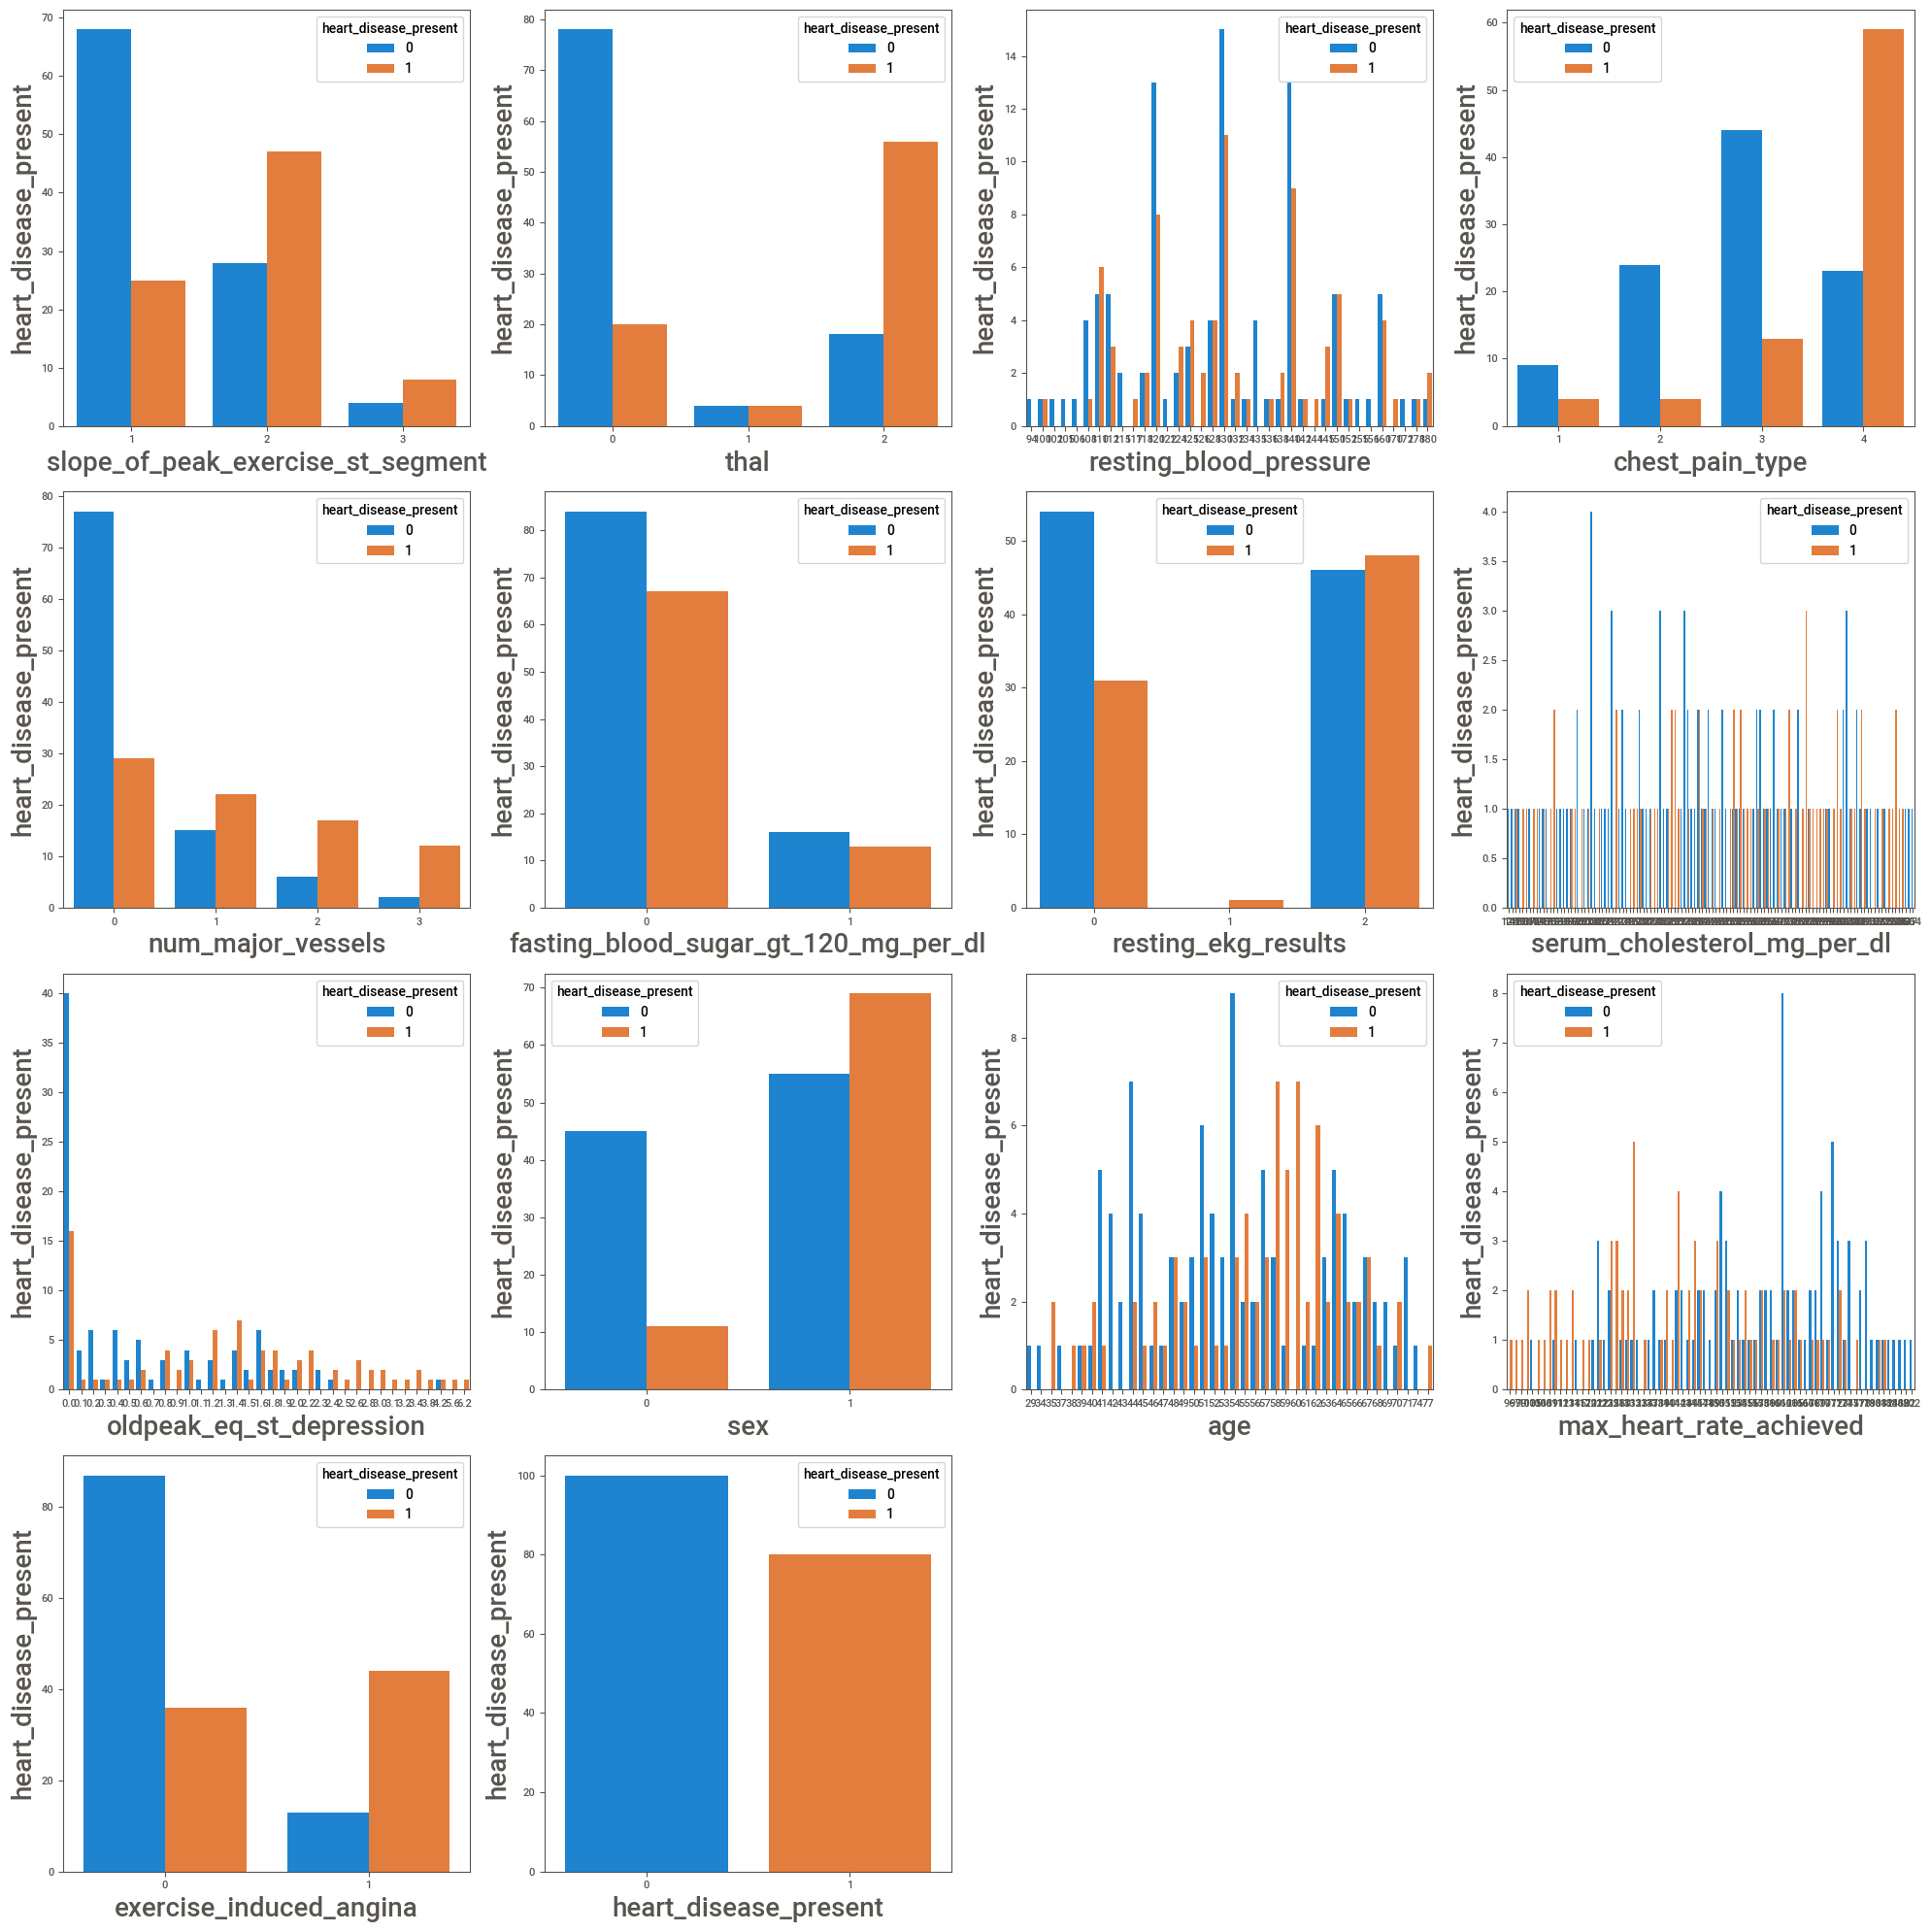

In [66]:
# Iterate through each column and create a countplot
plotnumber = 1
plt.figure(figsize=(20, 20))
for column in data:
    ax = plt.subplot(4, 4, plotnumber)
    sns.countplot(x=data[column].dropna(axis=0), hue=data['heart_disease_present'])
    plt.xlabel(column, fontsize=20)
    plt.ylabel('heart_disease_present', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

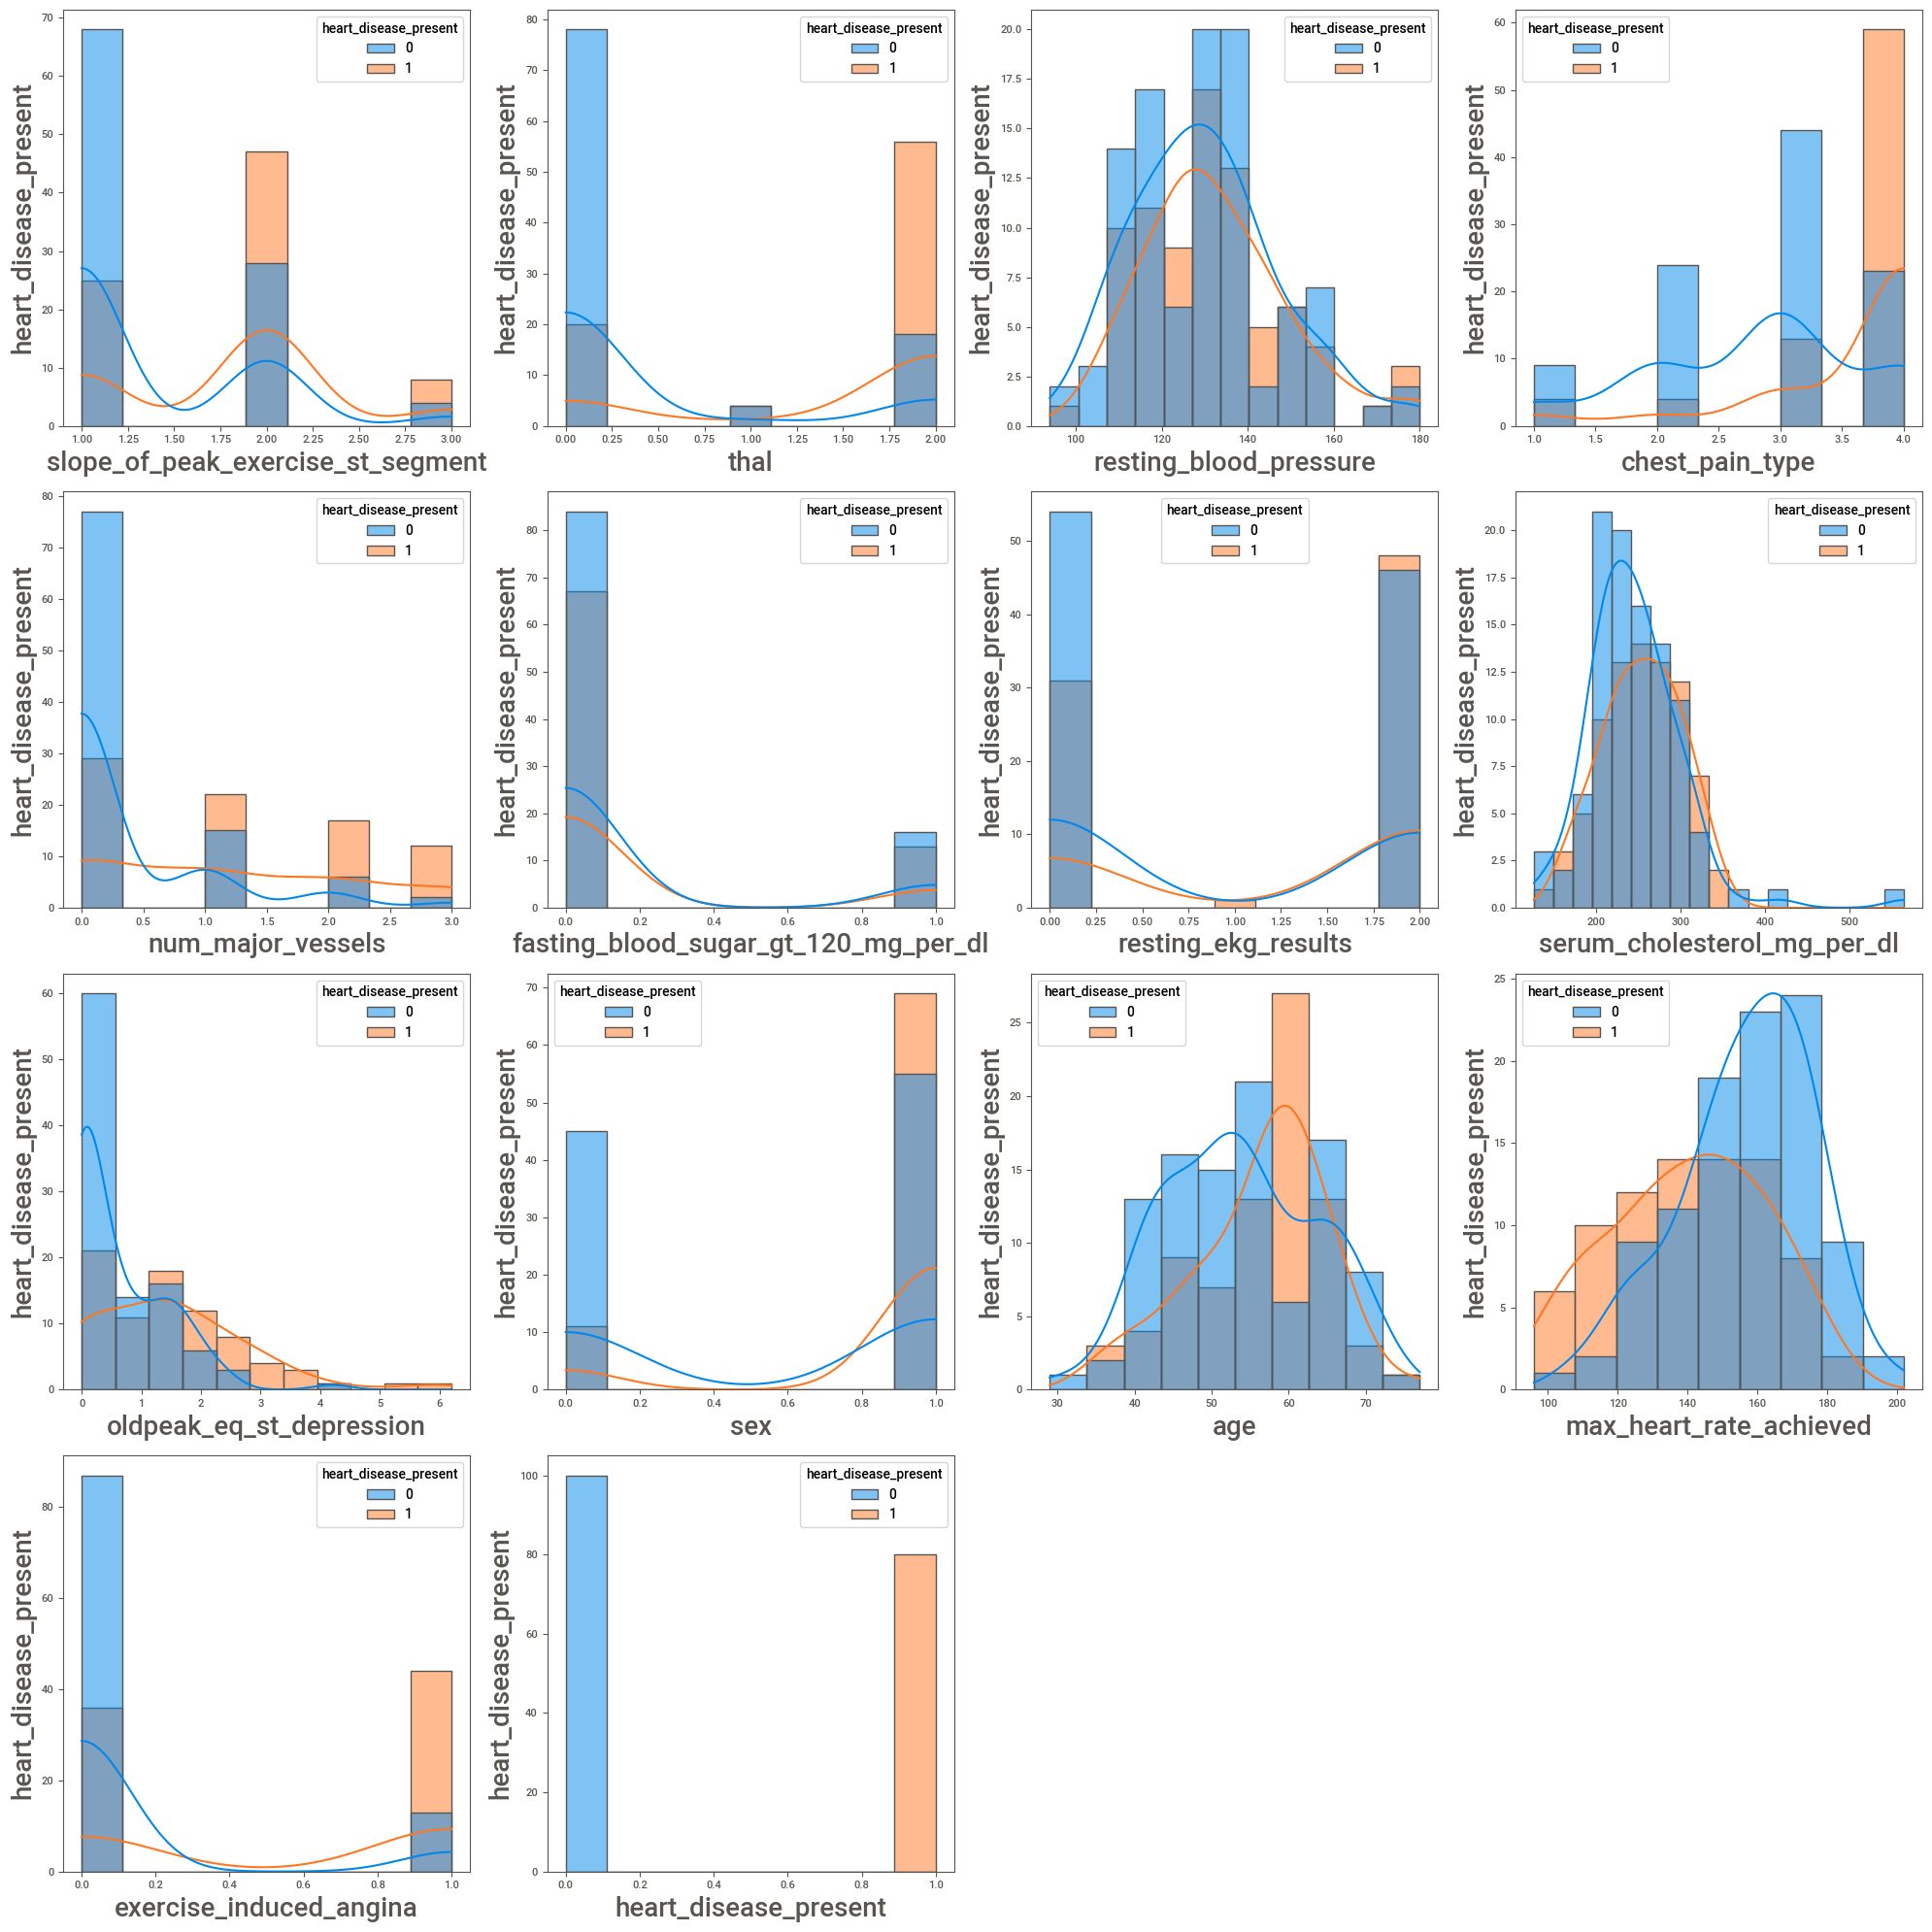

In [67]:
plotnumber = 1
plt.figure(figsize=(20, 20))
for column in data:
    ax = plt.subplot(4, 4, plotnumber)
    sns.histplot(x=data[column].dropna(axis=0), hue=data['heart_disease_present'], kde=True)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('heart_disease_present', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

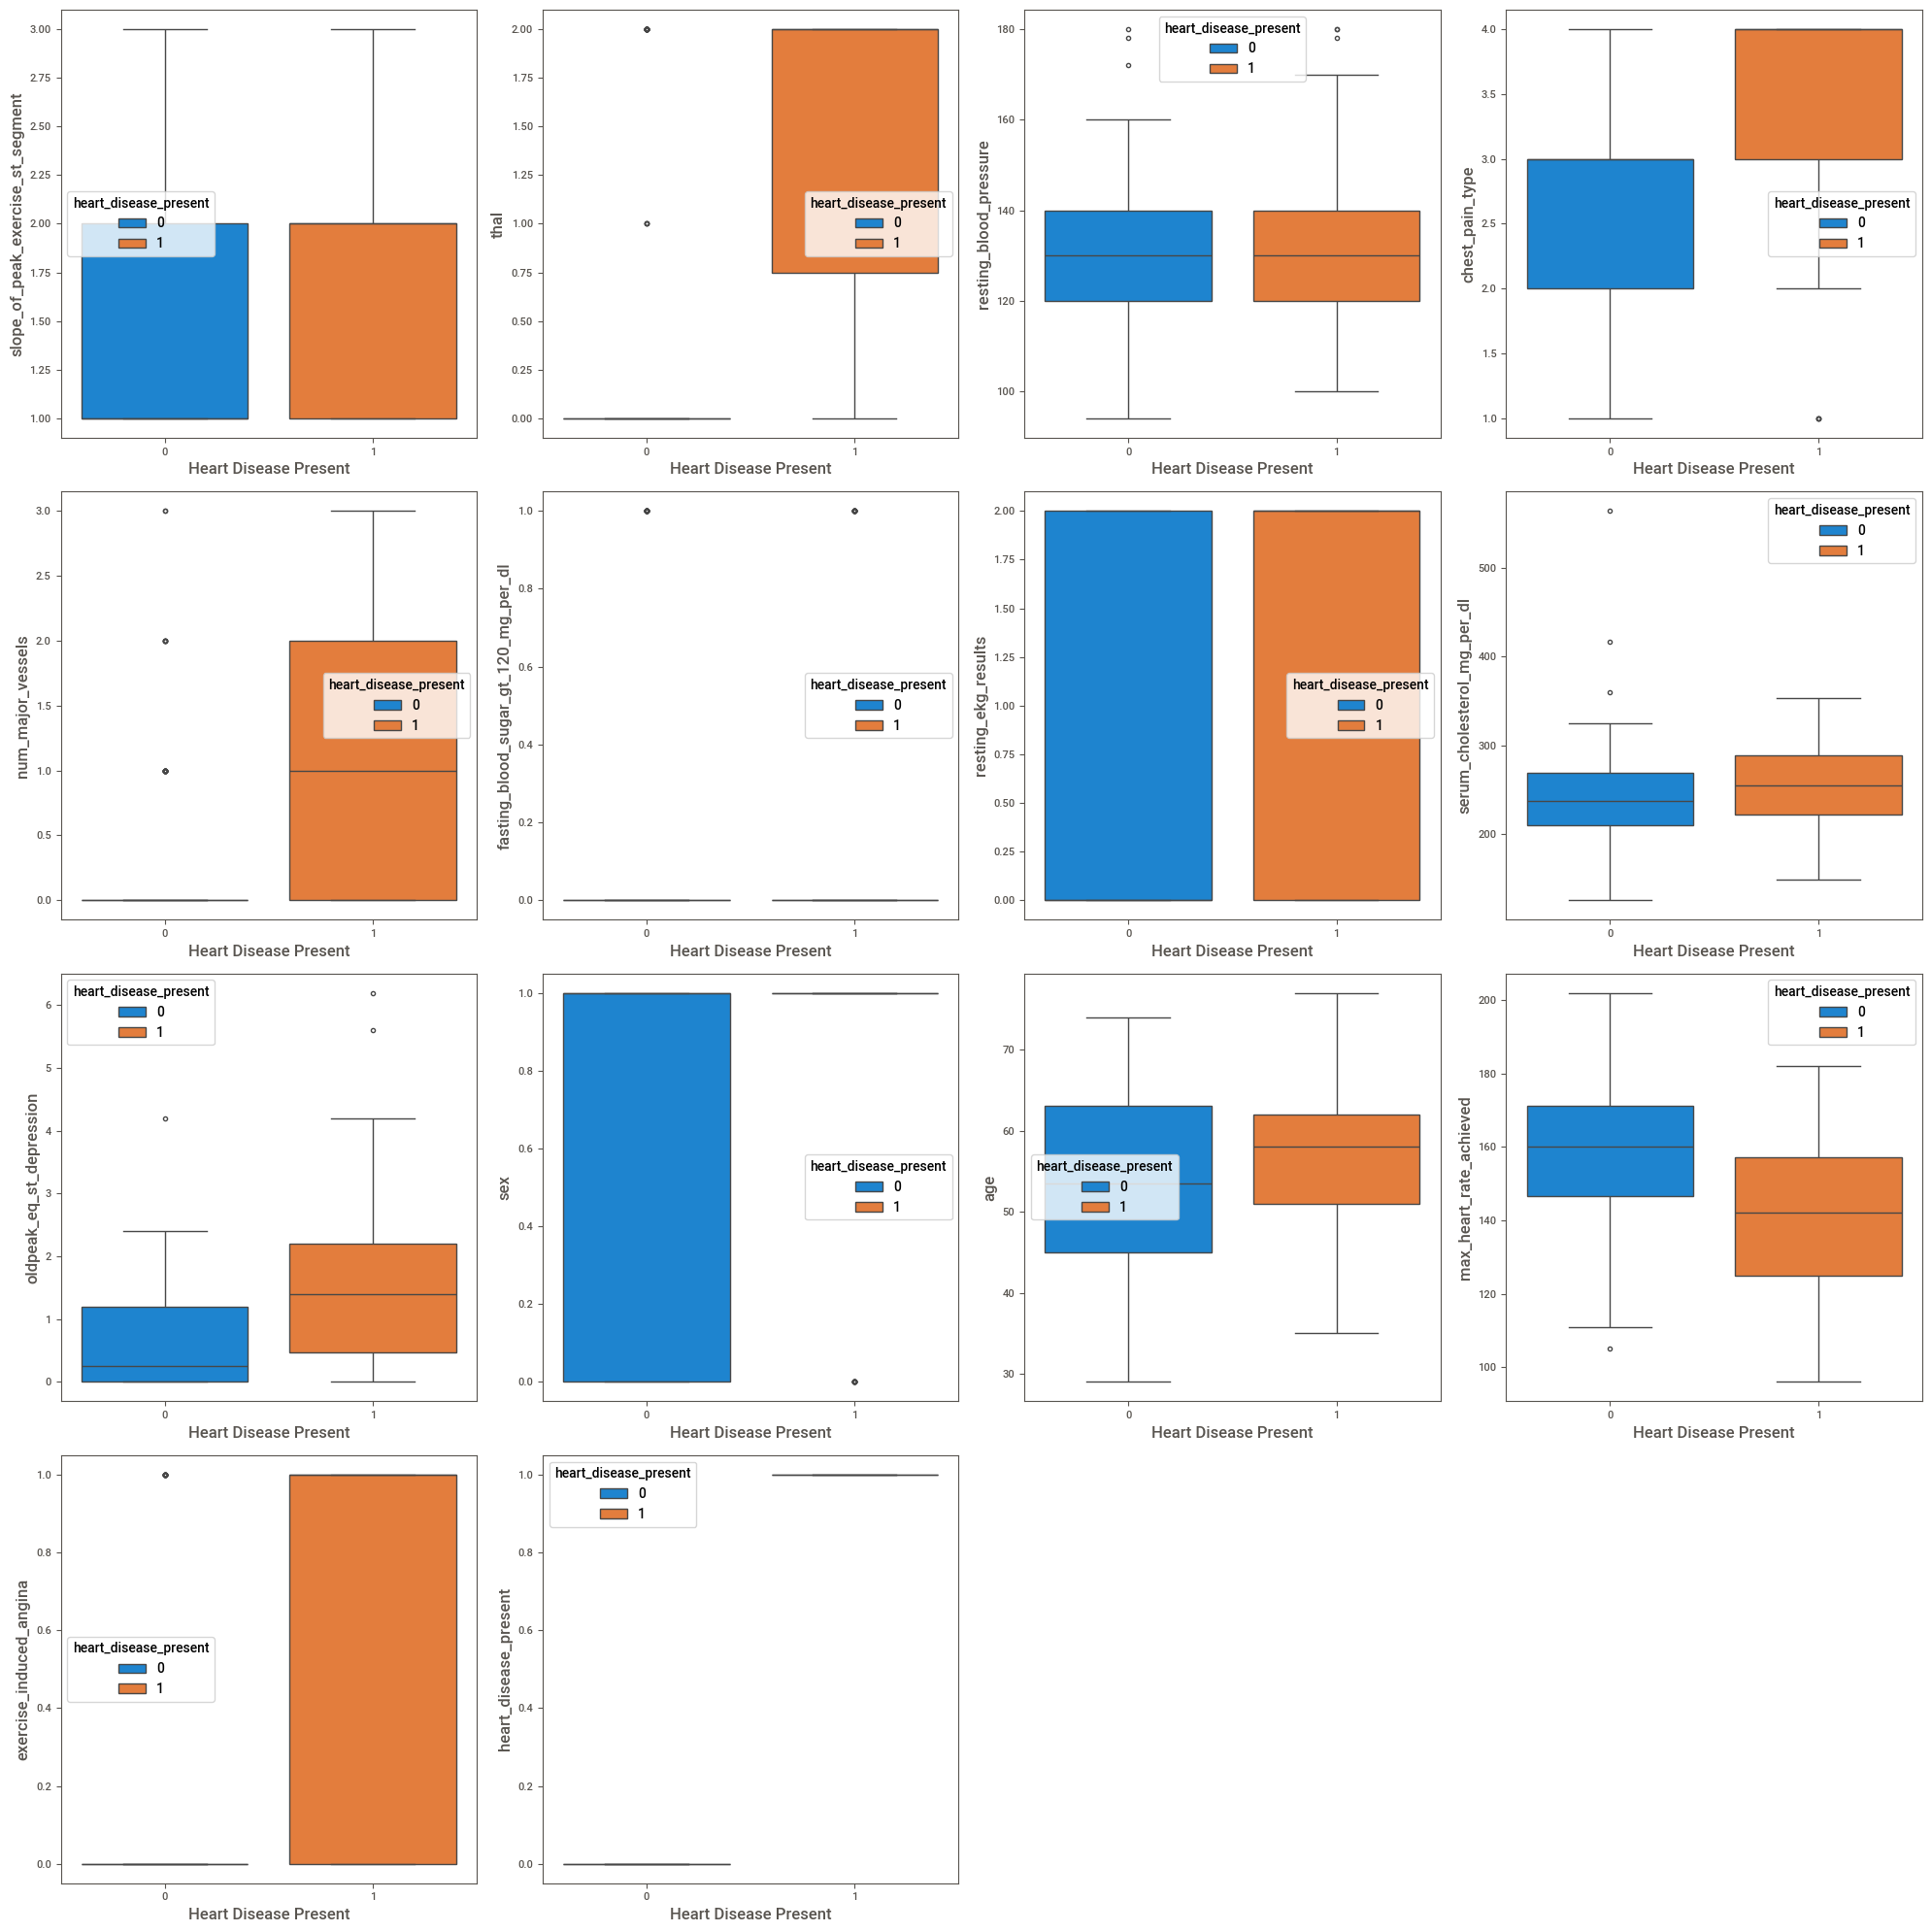

In [68]:
plotnumber = 1
plt.figure(figsize=(20, 20))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4,4, i)
    sns.boxplot(x='heart_disease_present', y=column, data=data,hue=data['heart_disease_present'])
    plt.xlabel('Heart Disease Present', fontsize=12)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()

### Outlier Handling

In [70]:
q1 = data['resting_blood_pressure'].quantile(0.25)
q3 = data['resting_blood_pressure'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['resting_blood_pressure'] < q1 - 1.5 * iqr) | (data['resting_blood_pressure'] > q3 + 1.5 * iqr)]

outliers

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,0,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,2,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,2,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,2,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,0,180,4,0,0,1,327,3.4,0,55,117,1,1


In [71]:
data['resting_blood_pressure'].median()

130.0

In [72]:
data.loc[[4,33,72,75,113,176], 'resting_blood_pressure'] = 130.0
data.loc[[4,33,72,75,113,176]]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,2,130,1,0,0,2,270,4.2,1,59,145,0,0
33,1,0,130,4,0,0,0,325,0.0,0,64,154,1,0
72,1,2,130,3,0,1,0,199,0.5,1,52,162,0,0
75,2,2,130,4,2,1,0,228,1.0,0,66,165,1,1
113,2,2,130,3,0,1,2,274,1.6,1,68,150,1,1
176,2,0,130,4,0,0,1,327,3.4,0,55,117,1,1


In [73]:
q1 = data['serum_cholesterol_mg_per_dl'].quantile(0.25)
q3 = data['serum_cholesterol_mg_per_dl'].quantile(0.75)
iqr = q3 - q1
outliers = data[(data['serum_cholesterol_mg_per_dl'] < q1 - 1.5 * iqr) | (data['serum_cholesterol_mg_per_dl'] > q3 + 1.5 * iqr)]
outliers

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,1,0,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,2,115,3,0,0,2,564,1.6,0,67,160,0,0


In [74]:
data['serum_cholesterol_mg_per_dl'].median()

245.5

In [75]:
data.loc[[43,60], 'serum_cholesterol_mg_per_dl'] = 245.5
data.loc[[43,60]]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,1,0,140,3,1,1,2,245.5,0.8,0,65,157,0,0
60,2,2,115,3,0,0,2,245.5,1.6,0,67,160,0,0


In [76]:
q1 = data['oldpeak_eq_st_depression'].quantile(0.25)
q3 = data['oldpeak_eq_st_depression'].quantile(0.75)
iqr = q3 - q1
outliers = data[(data['oldpeak_eq_st_depression'] < q1 - 1.5 * iqr) | (data['oldpeak_eq_st_depression'] > q3 + 1.5 * iqr)]
outliers

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,2,130,1,0,0,2,270.0,4.2,1,59,145,0,0
112,2,2,140,4,3,0,0,298.0,4.2,1,51,122,1,1
140,3,2,140,4,0,0,0,217.0,5.6,1,55,111,1,1
162,3,2,160,4,3,0,2,164.0,6.2,0,62,145,0,1


In [77]:
data['oldpeak_eq_st_depression'].median()

0.8

In [78]:
data.loc[[4,112,140,162],'oldpeak_eq_st_depression']=0.8
data.loc[[4,112,140,162]]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,2,130,1,0,0,2,270.0,0.8,1,59,145,0,0
112,2,2,140,4,3,0,0,298.0,0.8,1,51,122,1,1
140,3,2,140,4,0,0,0,217.0,0.8,1,55,111,1,1
162,3,2,160,4,3,0,2,164.0,0.8,0,62,145,0,1


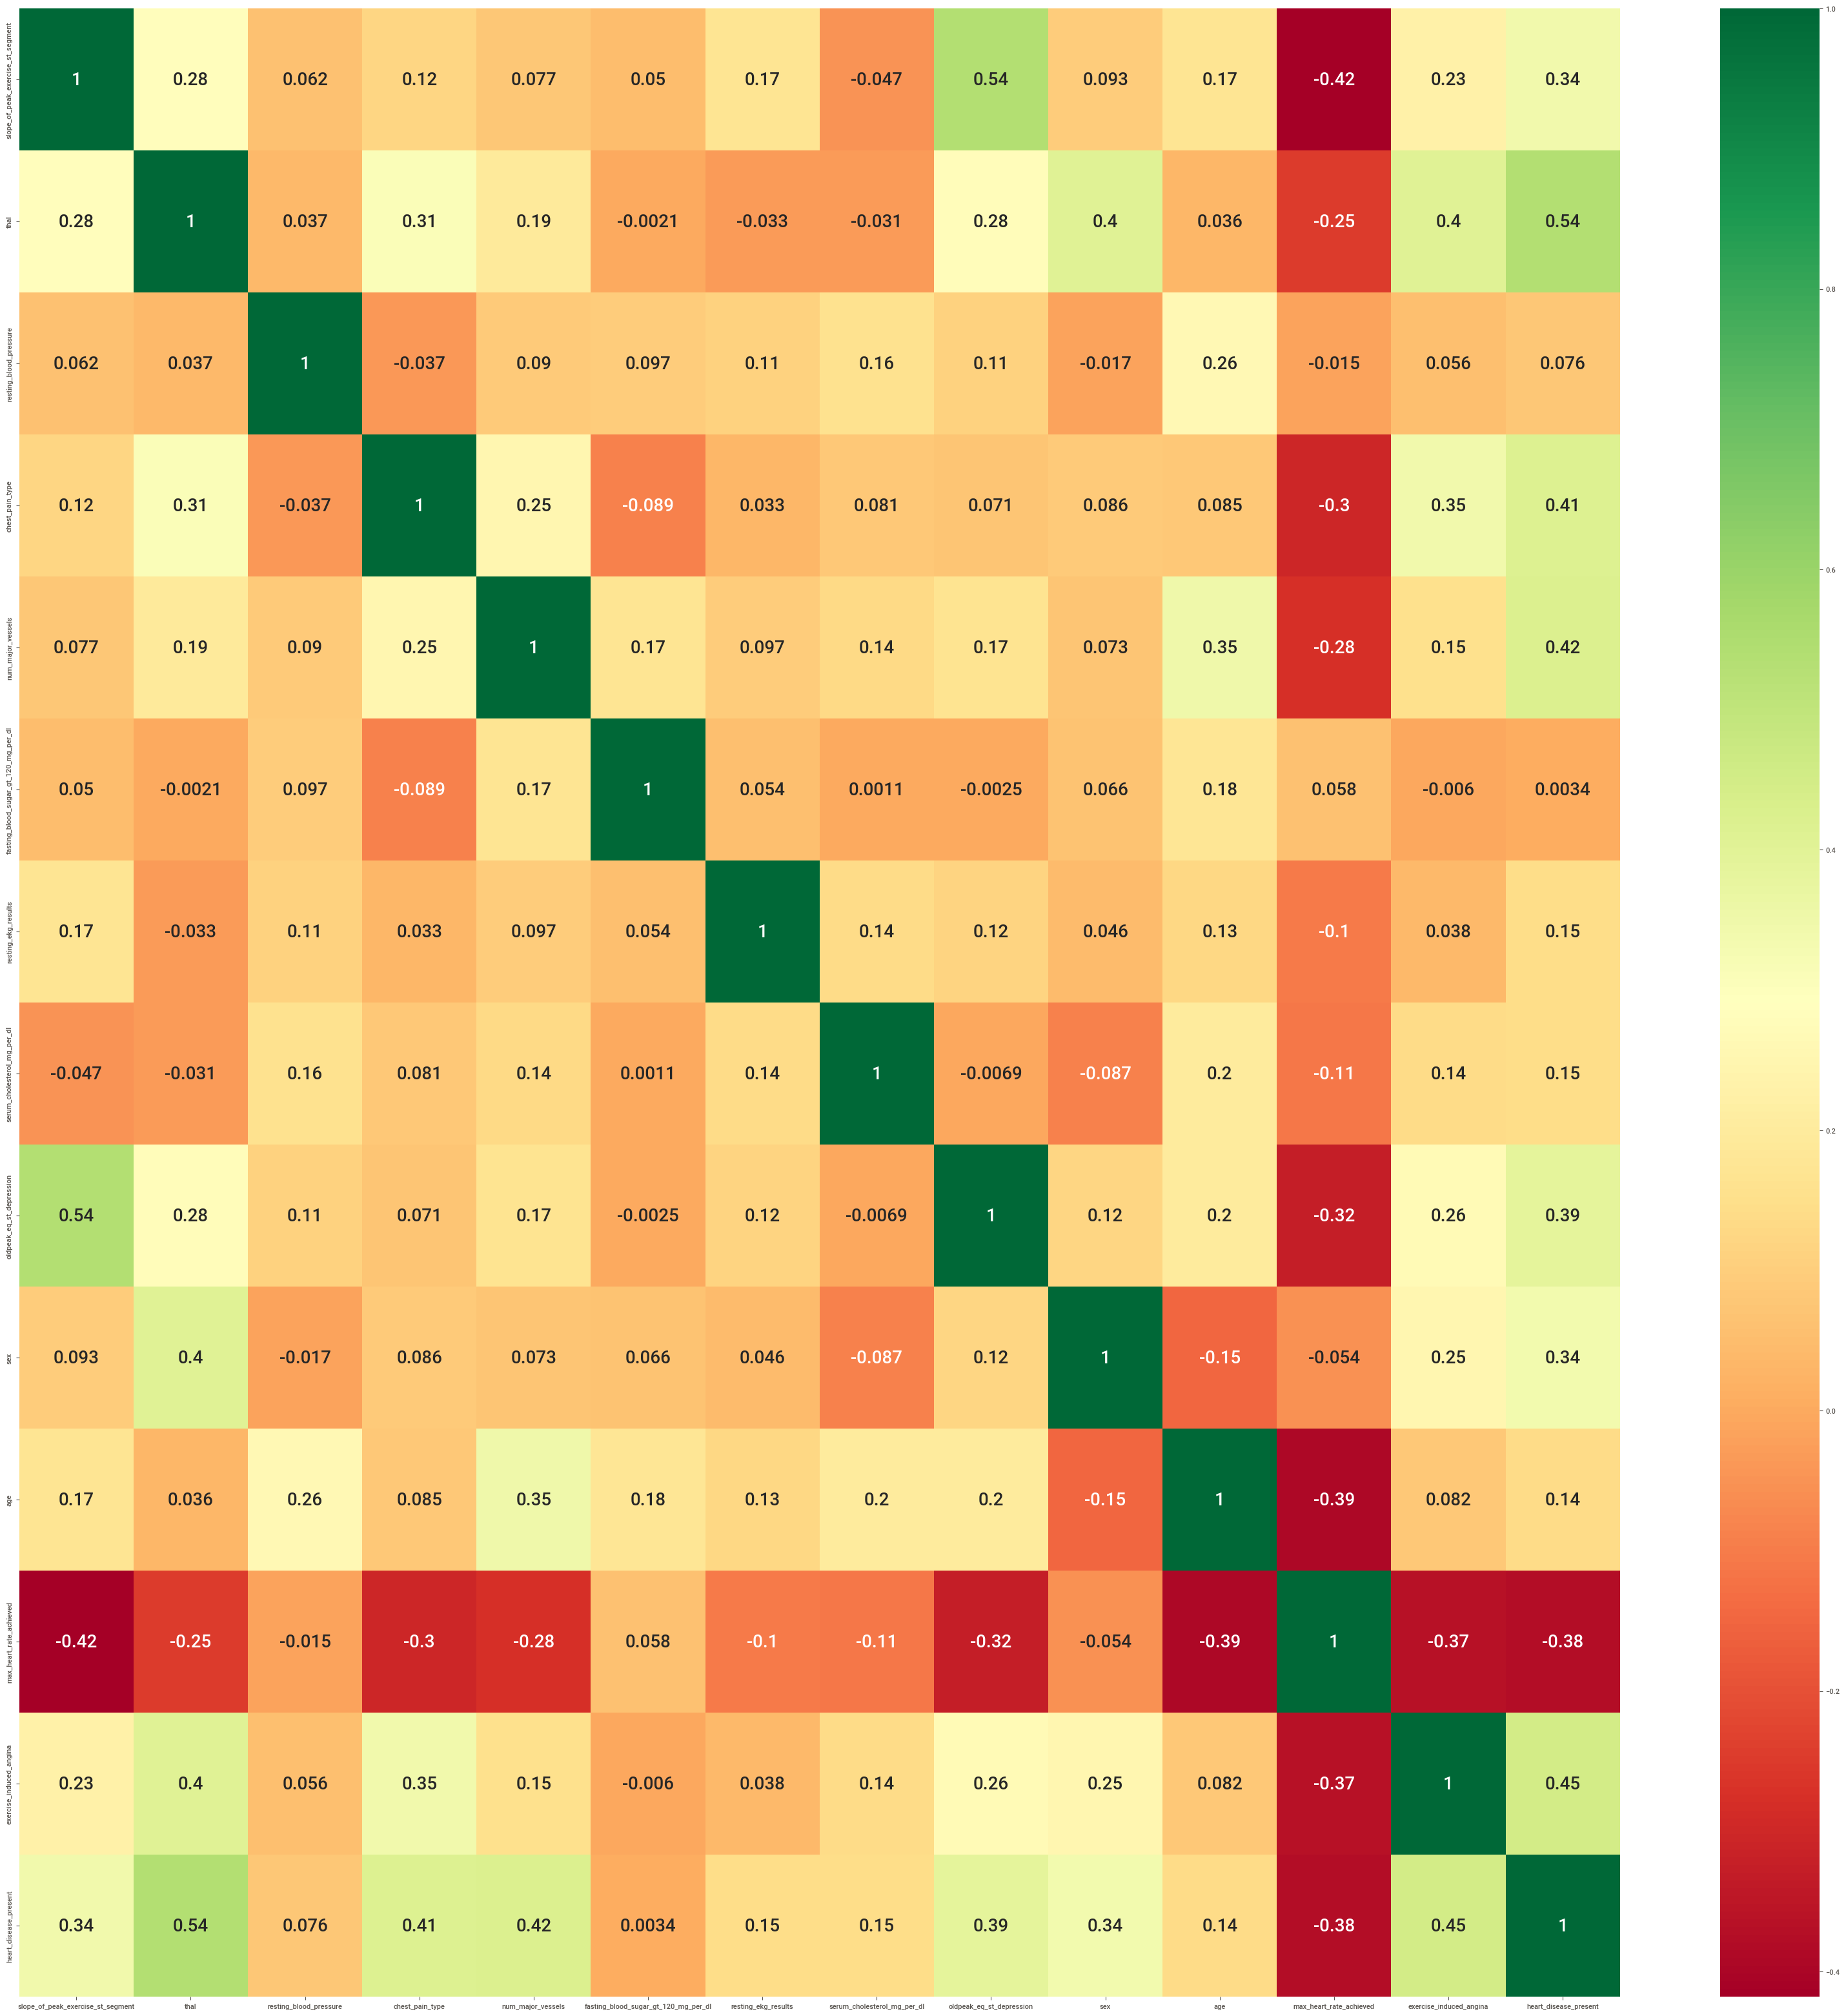

In [79]:
plt.figure(figsize=(40, 40))  # canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":20})# Get correlation between 'slope_of_peak_exercise_st_segment' and 'oldpeak_eq_st_depression'
correlation = data[['slope_of_peak_exercise_st_segment', 'oldpeak_eq_st_depression']].corr().iloc[0, 1]

### Splitting Dataset into Train and Test


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=3)


In [82]:
print(x.shape,x_train.shape,x_test.shape)

(180, 13) (144, 13) (36, 13)


In [83]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


### Transform the thal categorical column into Numeric labels

In [85]:
from sklearn.preprocessing import LabelEncoder

# Apply to each categorical column
label_encoder = LabelEncoder()
x_train['thal'] = label_encoder.fit_transform(x_train['thal'])
x_test['thal'] = label_encoder.transform(x_test['thal'])


## Model Creation and Evaluation

### Logistic Regression Model

In [201]:
model_LR= LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

In [203]:
y_pred=model_LR.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
y_train

75     1
14     1
45     1
34     1
40     0
      ..
15     1
8      1
129    1
122    0
161    1
Name: heart_disease_present, Length: 144, dtype: int64

### Model Accuracy

In [205]:
score=accuracy_score(y_test,y_pred)
print("the accuracy score is ",score)

the accuracy score is  0.8055555555555556


### Building a Predictive Model Using Logistic Regession

In [94]:
 
input_data=(1,	0,	125,	4,	3,	0,	2,	304,	0.0,	1,	77,	162,	1)
arr=np.array(input_data)
print(arr)


[  1.   0. 125.   4.   3.   0.   2. 304.   0.   1.  77. 162.   1.]


In [95]:
prediction=model_LR.predict(arr.reshape(1,-1))
if prediction==0:
    print('healthy')
else:
    print('ill')
                                 

ill


### Linear Regression

In [97]:
# Train the model
from sklearn.linear_model import LinearRegression
model_Lr = LinearRegression()
model_Lr.fit(x_train, y_train)

LinearRegression()

In [98]:
input_data=(1,	0,	125,	4,	3,	0,	2,	304,	0.0,	1,	77,	162,	1)
arr=np.array(input_data)
print(arr)


[  1.   0. 125.   4.   3.   0.   2. 304.   0.   1.  77. 162.   1.]


In [150]:
prediction=model_Lr.predict(arr.reshape(1,-1))
if prediction==0:
    print('healthy')
else:
    print('ill')
                  

ill


### Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest:")
print(f"Accuracy: {accuracy:.2f}")

Random Forest:
Accuracy: 0.81


### Building a Predictive Model 

In [156]:

input_data=(1,	0,	125,	4,	3,	0,	2,	304,	0.0,	1,	77,	162,	1)
arr=np.array(input_data)
print(arr)

[  1.   0. 125.   4.   3.   0.   2. 304.   0.   1.  77. 162.   1.]


In [158]:
prediction=model_RF.predict(arr.reshape(1,-1))
if prediction==0:
    print('healthy')
else:
    print('ill')

ill


### Support Vector Machine (SVM)

In [236]:
from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
y_pred=model_SVM.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("the accuracy score is ",score)

the accuracy score is  0.6111111111111112


 ### Building a Predictive Model 

In [231]:
input_data=(1,	0,	125,	4,	3,	0,	2,	304,	0.0,	1,	77,	162,	1)
arr=np.array(input_data)
print(arr)

[  1.   0. 125.   4.   3.   0.   2. 304.   0.   1.  77. 162.   1.]


In [233]:
prediction=model_SVM.predict(arr.reshape(1,-1))
if prediction==0:
    print('healthy')
else:
    print('ill')

healthy


### Naive Bayes (GaussianNB)

In [243]:
from sklearn.naive_bayes import GaussianNB
model_NB=GaussianNB()
model_NB.fit(x_train, y_train)
y_pred=model_NB.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("the accuracy score is ",score)

the accuracy score is  0.8055555555555556


 ### Building a Predictive Model 

In [247]:
input_data=(1,	0,	125,	4,	3,	0,	2,	304,	0.0,	1,	77,	162,	1)
arr=np.array(input_data)
print(arr)

[  1.   0. 125.   4.   3.   0.   2. 304.   0.   1.  77. 162.   1.]


In [249]:
prediction=model_NB.predict(arr.reshape(1,-1))
if prediction==0:
    print('healthy')
else:
    print('ill')

ill


### K-Nearest Neighbors (KNN)

In [253]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
y_pred=model_KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("the accuracy score is ",score)

the accuracy score is  0.5555555555555556


### Building a Predictive Model 

In [256]:
input_data=(1,	0,	125,	4,	3,	0,	2,	304,	0.0,	1,	77,	162,	1)
arr=np.array(input_data)
print(arr)
prediction=model_NB.predict(arr.reshape(1,-1))
if prediction==0:
    print('healthy')
else:
    print('ill')

[  1.   0. 125.   4.   3.   0.   2. 304.   0.   1.  77. 162.   1.]
ill


### Decision Tree (DT)

In [268]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier()
model_DT.fit(x_train, y_train)
y_pred=model_DT.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("the accuracy score is ",score)

the accuracy score is  0.7222222222222222


### Building a Predictive Model 

In [272]:
input_data=(1,	0,	125,	4,	3,	0,	2,	304,	0.0,	1,	77,	162,	1)
arr=np.array(input_data)
print(arr)
prediction=model_DT.predict(arr.reshape(1,-1))
if prediction==0:
    print('healthy')
else:
    print('ill')

[  1.   0. 125.   4.   3.   0.   2. 304.   0.   1.  77. 162.   1.]
ill


### Model Comparison Report

In [275]:
models = {
    '\nLogistic Regression': LogisticRegression(),
    '\nRandom Forest': RandomForestClassifier(),
    '\nSupport Vector Machine':SVC(),
    '\nNaive Bayes':GaussianNB(),
    '\nK-Nearest Neighbors':KNeighborsClassifier(),
    '\nDecision Tree':DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    print(f'{name} Report:')
    print(classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.91      0.62      0.74        16

    accuracy                           0.81        36
   macro avg       0.83      0.79      0.79        36
weighted avg       0.83      0.81      0.80        36

Accuracy: 0.8055555555555556
Confusion Matrix:
[[19  1]
 [ 6 10]]

Random Forest Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.83      0.62      0.71        16

    accuracy                           0.78        36
   macro avg       0.79      0.76      0.77        36
weighted avg       0.79      0.78      0.77        36

Accuracy: 0.7777777777777778
Confusion Matrix:
[[18  2]
 [ 6 10]]

Support Vector Machine Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        20
           1       1.

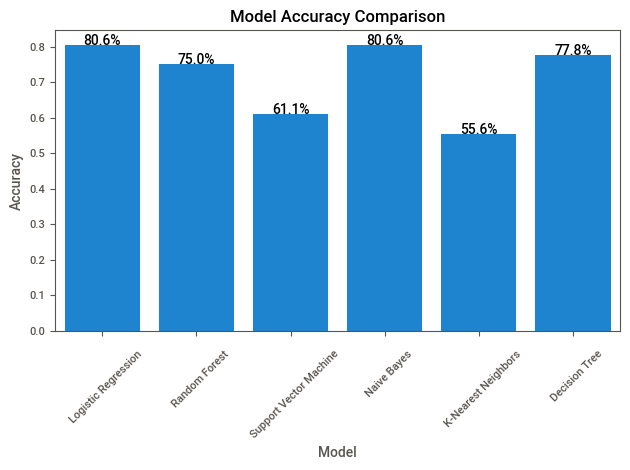

In [311]:

# Collect accuracy results
accuracy_df = pd.DataFrame([{"Model": name, "Accuracy": accuracy_score(y_test, model.fit(x_train, y_train).predict(x_test))} 
                            for name, model in models.items()])

# Plot accuracy with percentage labels
sns.barplot(x="Model", y="Accuracy", data=accuracy_df)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)

# Add percentage labels
for bar in plt.gca().patches:
    plt.gca().annotate(f'{bar.get_height() * 100:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center')

plt.tight_layout()
plt.show()

### Conclusion

Heart disease remains one of the leading causes of death worldwide, presenting a significant challenge to healthcare systems. However, advancements in data science and machine learning provide new opportunities to address this issue proactively. By implementing robust, data-driven systems, hospitals can revolutionize their approach to heart disease prevention and management.

Predictive models trained on comprehensive patient datasets can enable early detection of heart disease, allowing healthcare providers to identify at-risk individuals before symptoms manifest. This proactive approach not only reduces the burden of acute medical interventions but also improves patient outcomes through timely preventive care. For example, insights derived from predictive analytics can guide tailored health plans, such as dietary modifications, exercise regimens, and stress management strategies, thereby lowering the overall risk.

Hospitals can further enhance these systems by ensuring the continuous collection and analysis of high-quality data. Integrating real-time patient metrics, longitudinal studies, and external health data into predictive models can refine their accuracy and reliability. Additionally, creating a feedback loop to assess and adjust model performance based on patient outcomes ensures ongoing improvement and adaptation to new insights.

To achieve these goals, healthcare institutions must invest in training their staff to use predictive tools effectively, integrating them seamlessly into clinical workflows. It is equally important to prioritize ethical considerations, such as data privacy and equitable treatment, to maintain patient trust and compliance with regulatory frameworks like HIPAA.

In summary, the adoption of data-driven strategies offers hospitals a powerful tool to combat heart disease. With proper implementation, these systems can save lives by reducing the incidence of life-threatening events and promoting healthier lifestyles. Hospitals have the opportunity to lead this transformative change, significantly impacting the fight against heart disease and improving community health outcomes. By embracing innovation and collaboration, healthcare providers can ensure a future where heart disease prevention is more effective, accessible, and inclusive.

## Challenges Faced

Here we have to combine the values from label csv to value csv file to make dataset.

In some of the features there are so many outliers,so we have to replace that outliers with mean,median or mode.

